# Casos COVID-2019
___
Analise feito com base nos dados da Secretaria de Saúde de Minas Gerais: 
[Dados CSV](https://www.saude.mg.gov.br/coronavirus/painel)

Lista de Tarefas:

- [ ] Casos em MG
- [ ] Numero de obitos  
- [ ] Casos por Sexo
- [ ] Casos por Faixa Etaria

### Importando Módulos

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

### Casos em Minas Gerais 

In [10]:
df = pd.read_csv('DataSets/covid-19.csv',sep = ',',encoding='ISO-8859-1')

In [11]:
df_casos = df.filter(items = ['DATA_NOTIFICACAO','CLASSIFICACAO_CASO'])
df_casos = df_casos[df_casos['CLASSIFICACAO_CASO'] == 'Caso Confirmado']

In [29]:
index = np.arange(0,len(df_casos),1)
df_casos = df_casos.set_index(index)

In [31]:
df_casos['CONTADOR'] = 1

In [36]:
df_casos = df_casos.filter(items = ['DATA_NOTIFICACAO','CONTADOR']).groupby('DATA_NOTIFICACAO',as_index = False).sum()

In [38]:
df_casos['CASOS_ACUMULADOS'] = 0

for i in range(len(df_casos)):
    if i == 0:
        df_casos.loc[i,'CASOS_ACUMULADOS'] = df_casos.loc[i,'CONTADOR']
    else:
        df_casos.loc[i,'CASOS_ACUMULADOS'] = df_casos.loc[i,'CONTADOR'] + df_casos.loc[i - 1,'CASOS_ACUMULADOS']

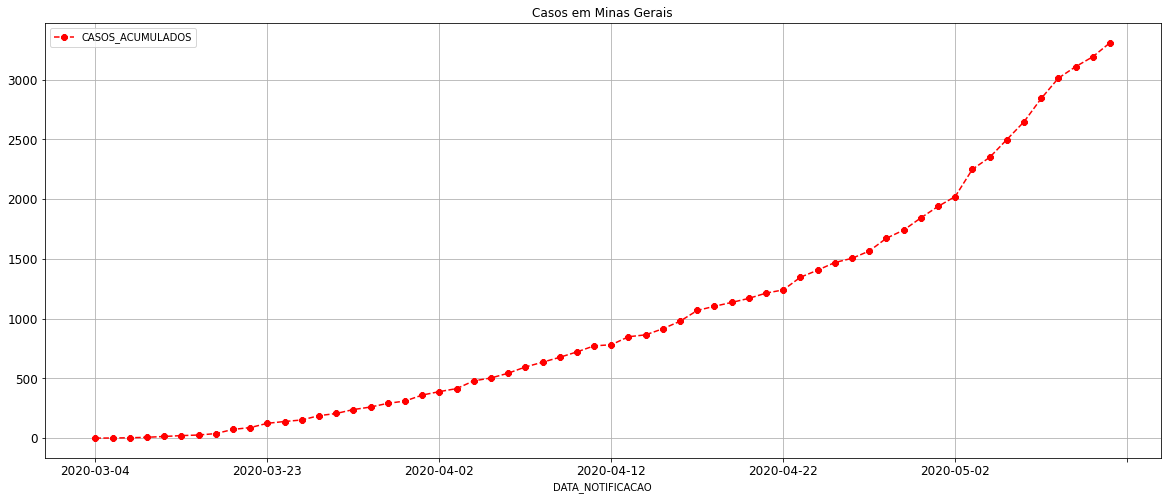

In [50]:
df_casos.plot(style='8--',x = 'DATA_NOTIFICACAO',y = 'CASOS_ACUMULADOS',figsize = (20,8),color = 'red',grid = True,title = 'Casos em Minas Gerais',fontsize = 12)

In [52]:
df_casos.dtypes

DATA_NOTIFICACAO    object
CONTADOR             int64
CASOS_ACUMULADOS     int64
dtype: object

In [53]:
df_teste = df_casos

In [54]:
df_teste['DATA_NOTIFICACAO'] = df_teste['DATA_NOTIFICACAO'].apply(lambda x : int(x))

ValueError: invalid literal for int() with base 10: '2020-03-04'